In [ ]:
#Edgar Moises Hernandez-Gonzalez
#07/07/19
#Digitos con CNN input=images
#Escalar todos los datos y luego dividir, el escalador se entrena con todo x

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
num_classes = 10
n_samples = len(digits.target)
print(digits.images.shape)
print(digits.target.shape)
print(n_samples)

(1797, 8, 8)
(1797,)
1797


In [3]:
#convertir de 3D a 4D
x = digits.images.reshape((n_samples, 8, 8, 1))
print(x.shape)

(1797, 8, 8, 1)


In [4]:
#escalar los datos para que esten en un rango de 0 a 1
x = x / 16.0

In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, digits.target)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 1024, validation_data=(x_test, y_test))

Train on 1347 samples, validate on 450 samples
Epoch 1/200
1347/1347 [==============================] - 2s 1ms/sample - loss: 2.3028 - acc: 0.1284 - val_loss: 2.2947 - val_acc: 0.1511
Epoch 2/200
1347/1347 [==============================] - 0s 19us/sample - loss: 2.2884 - acc: 0.1589 - val_loss: 2.2828 - val_acc: 0.1533
Epoch 3/200
1347/1347 [==============================] - 0s 19us/sample - loss: 2.2761 - acc: 0.1722 - val_loss: 2.2710 - val_acc: 0.1867
Epoch 4/200
1347/1347 [==============================] - 0s 20us/sample - loss: 2.2653 - acc: 0.1930 - val_loss: 2.2588 - val_acc: 0.2556
Epoch 5/200
1347/1347 [==============================] - 0s 21us/sample - loss: 2.2501 - acc: 0.2829 - val_loss: 2.2460 - val_acc: 0.3822
Epoch 6/200
1347/1347 [==============================] - 0s 21us/sample - loss: 2.2402 - acc: 0.3118 - val_loss: 2.2331 - val_acc: 0.4178
Epoch 7/200
1347/1347 [==============================] - 0s 21us/sample - loss: 2.2250 - acc: 0.3593 - val_loss: 2.2182 - val_

1347/1347 [==============================] - 0s 21us/sample - loss: 0.3301 - acc: 0.9131 - val_loss: 0.2841 - val_acc: 0.9267
Epoch 60/200
1347/1347 [==============================] - 0s 24us/sample - loss: 0.3520 - acc: 0.9042 - val_loss: 0.2848 - val_acc: 0.9378
Epoch 61/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.3334 - acc: 0.9072 - val_loss: 0.2667 - val_acc: 0.9378
Epoch 62/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.2944 - acc: 0.9258 - val_loss: 0.2566 - val_acc: 0.9333
Epoch 63/200
1347/1347 [==============================] - 0s 18us/sample - loss: 0.3100 - acc: 0.9146 - val_loss: 0.2503 - val_acc: 0.9422
Epoch 64/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.2904 - acc: 0.9213 - val_loss: 0.2487 - val_acc: 0.9400
Epoch 65/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.2837 - acc: 0.9250 - val_loss: 0.2386 - val_acc: 0.9489
Epoch 66/200
1347/1347 [================

1347/1347 [==============================] - 0s 20us/sample - loss: 0.1046 - acc: 0.9748 - val_loss: 0.0962 - val_acc: 0.9756
Epoch 118/200
1347/1347 [==============================] - 0s 18us/sample - loss: 0.0979 - acc: 0.9740 - val_loss: 0.0961 - val_acc: 0.9778
Epoch 119/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.1072 - acc: 0.9710 - val_loss: 0.0962 - val_acc: 0.9756
Epoch 120/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0906 - acc: 0.9792 - val_loss: 0.0955 - val_acc: 0.9756
Epoch 121/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0958 - acc: 0.9748 - val_loss: 0.0953 - val_acc: 0.9733
Epoch 122/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.0966 - acc: 0.9755 - val_loss: 0.0962 - val_acc: 0.9733
Epoch 123/200
1347/1347 [==============================] - 0s 18us/sample - loss: 0.0872 - acc: 0.9785 - val_loss: 0.0940 - val_acc: 0.9733
Epoch 124/200
1347/1347 [=========

1347/1347 [==============================] - 0s 19us/sample - loss: 0.0432 - acc: 0.9933 - val_loss: 0.0715 - val_acc: 0.9756
Epoch 176/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0455 - acc: 0.9903 - val_loss: 0.0691 - val_acc: 0.9822
Epoch 177/200
1347/1347 [==============================] - 0s 22us/sample - loss: 0.0436 - acc: 0.9926 - val_loss: 0.0669 - val_acc: 0.9800
Epoch 178/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0538 - acc: 0.9881 - val_loss: 0.0649 - val_acc: 0.9800
Epoch 179/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0415 - acc: 0.9896 - val_loss: 0.0658 - val_acc: 0.9778
Epoch 180/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0450 - acc: 0.9896 - val_loss: 0.0701 - val_acc: 0.9778
Epoch 181/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.0487 - acc: 0.9889 - val_loss: 0.0703 - val_acc: 0.9778
Epoch 182/200
1347/1347 [=========

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

450/450 [==============================] - 0s 82us/sample - loss: 0.0631 - acc: 0.9867
Test loss: 0.06309458568588727
Test accuracy: 0.9866667


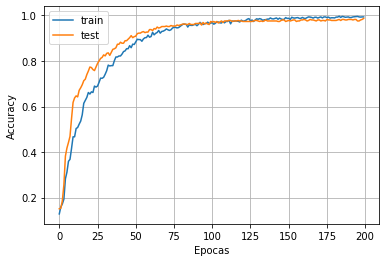

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

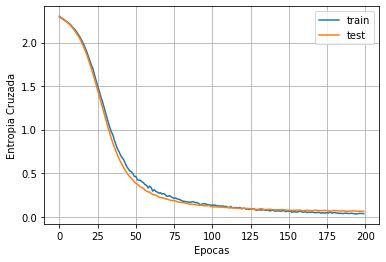

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()